


<center><b>Cellular Image Classification</b></center>
<center><b>MR. Fugu</b></center>
<center><b>Capstone Summer 2019</b></center>

`--------------------------------------------------------------------------------------------------------------------`

# Abstract:


The overall objective is classiying siRNA in each image and between batches. In order to classify unseen batches: we need to resolve noisy data and biological effects. The evaluation metric is average accuracy of siRNA classifier over all images. The size of data and number of classifiers for this project proved difficult to model. The initial use of Google TPU's seemed promising. Unfortunately, this is a newer product and limited experimentation and coherent documentation made this a hurdle. Next, multiple-GPU usage is neccessary considering 1-GPU inside native: Google colab resulted in memory issues and crashing after 4 hrs of training. Overall, this exercise of 'image classification' via Deep Learning has been a significant fail.

# Background:

Microscopy is an important skill for a Biologists as well as the Medical community: for example viewing protein-protein interactions, cytoskeletal dynamics, as well as cellular ion concentrations <sup>[1](https://www.nature.com/articles/srep20640)</sup>. During processing images are often taken in low light or short exposure which cause inherent noise <sup>[2](https://ieeexplore.ieee.org/document/8327626)</sup>.
Unfortunately, noise contributions during imaging create hurdles for interpretation as well as correctly identifying valuable assets within images. There are different kinds of noise but two common forms are (*Gaussian* white nose,*salt and pepper*). Filtering techniques are used to control noise such as (*median,non-local mean,bilateral,kernal density based local outlier factor, GridLof*) approaches. Often filtering will not be the only task as hand to resolve imperfections with image clarity or resolution which complicates matters. 

Imagine using clinical imaging such as microscopy to aid in drug deveolpment. The new age of bioinformatics will hedge on Machine Learning and Deep Learning. Currently, this is being brought to fruition through [Recursion Pharm](https://www.recursionpharma.com) and associated with [Kaggle](https://www.kaggle.com/competitions). The time frame to bring drugs to market averages around 10 years and hundreds of millions of dollars according to Recursion Pharma.  



[Denoising Microscopy](https://ieeexplore.ieee.org/document/8327626) |
[colab tpu setup](https://colab.research.google.com/notebooks/tpu.ipynb) |
[colab extra help](https://medium.com/@jannik.zuern/using-a-tpu-in-google-colab-54257328d7da) |
[denoising Github](https://github.com/meisamrf/Image-denoising-tensorflow-keras)

The images contain cellular staining allowing different parts of the cells to be exposed at different wavelengths inducing (flourescence) when excited; which correspond to an image channel. In this experiment there are 6 different channels and each represent a different part of the cell: 
* `nuclei` (blue)
* `endoplasmic reticulum` (green)
* `actin` (red)
* `nucleoli` (cyan)
* `mitochondria` (magenta)
* `Golgi apparatus` (yellow)

Each image is generated from biological  experiments using small interferring RNA, (siRNA). siRNA is known as a knockdown reagent; for selecting a particular gene. SiRNA's are able to assess individual gene contributions or multiple cellular processes such as: cellular differentiation, insulin signaling, apoptosis <sup>[3](https://dharmacon.horizondiscovery.com/applications/rna-interference/sirna/)</sup>.  Identifying pathways, cellular processes and cancer have resulted with the use of SiRNA's. Unfortunately, there is a downside with siRNA's, called off-target effects which impact interpretation of phenotypic effect in gene slicing, leading to possibly unwanted toxicity <sup>[4](https://www.nature.com/articles/nrd3010)</sup>. This normally is a problem that can be mitigated in varying ways, our experiment only focuses on one type of siRNA per gene.  





# Image Denoising and Classification

Flourescent imaging usually has mixed Gaussian-Poisson noise, this is caused by low photon-counting and sensor issues due to electronics. The major cause is signal dependent effects (*low-light source as well as short exposure*)  <sup>[5](http://bigwww.epfl.ch/publications/luisier1101.pdf)</sup>. Unfortunately, Poisson random variables  are difficult to model; therefore transformed domain techniques are used to create non-linear mapping to the raw data. One approach to solving this proplem can be: *Poisson-Guassian unbiased risk estimate (*PURE*), linear expansion of thresholds* (*LET*): (*PURE-LET*) [<sup>6</sup>](http://bigwww.epfl.ch/publications/luisier1101.pdf). Separating this term into the (*LET*) portion "linear expansion threshold" utilizes the minimization of *mean squared error* (*MSE*). 

The problem arises when estimating the underlying intensities of the Poisson random variables and separating the Gaussian white noise. Also, the fact that the data are transformed; does not guarantee (*orthonormal*) and if you want to optimze the (*MSE*) you need to work in the orignal domain, to find the *global minimization* value of (*MSE*). While this approach can be taken from work by *Florian Luisier et al. 2011*, I have found another approach which may be more aligned with current *Deep Learning* frameworks. This consists of building a *Deep Learning* model to find the noise in our model instead focusing on a *Convolutional Neural Network* (*CNN*). Recent work by the *Chan Zuckerburg Biohub* [<sup>7</sup>](https://www.preprints.org/manuscript/201812.0137/v1) suggested that instead of focusing on small pixel areas, expand to your region to multiple images and create a model to *learn* the noise variations between images such as *Jain et al 2009* [<sup>8</sup>](https://papers.nips.cc/paper/3506-natural-image-denoising-with-convolutional-networks.pdf) where they trained a 5 layer (*CNN*) to denoise natural images while capturing *lower error* rates. Similarly, work done by *Krizhevsky, Sutskever and Hinton* [<sup>9</sup>](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) made famous *AlexNet*, focusing on *Large Scale* deployment of *Visual-Recognition*. 

# Metadata:


File Description:

[train/test].zip: the image data. The image paths, such as `U2OS-01/Plate1/B02_s2_w3.png`

can be read as:

`Cell line and batch number`: (*U2OS batch 1*)

`Plate number`: (*01*)

`Well location on plate`: (*column B, row 02*)

`Site`: (*2*)

`Microscope channel`: (*3*)

`--------------------------------------`

+ *Each image was converted into a tensor for processing and modeling*

# Biological Experiment Overview:



+ 1108 different siRNA's knocking down 1108 different genes
+ 51 instances of the same experiment using different batches.
+ 384 well-plates 

Cells are isolated and placed in the wells, each well has 1 of the 1108 siRNA's, this creates distinct biological 'genetic' conditions. Due to environmental effects the outer perimeter of the wells are not used and only 308 of the 384 wells are used for each plate. 
+ There are 4 plates in this experiment
  + each plate has 30 control siRNA's and 277 different non-control siRNA's 
  + as well as 1 untreated well

+ each well is 3.3 ($mm^2$)

`__________________________________________`

*location of the 1108 siRNA's were randomized*

* Each `Well` in each plate contain two (512,512,6) images
 
   * each image was obtained from nonoverlapping regions within a well
   
 
* Each `Batch` is a single cell type:`24 in HUVEC, 11 in RPE, 11 in HepG2, and 5 in U2OS`
  
  +  A `Batch` is a set of experiment plates, executed at the same time with similar reagents. 
  
  + **Batch to Batch** variations occur, creating experimental or enviromental variaiton which is unavoidable. 

# Problem To Solve:

+ Create a model in two steps:
  
  + Classify the 1108 types of siRNA
  
  + After building and deploying the model: take care of noise to improve classification.
  
 Ideally, this project would have great significance in the medical community enhancing pharmacological studies and advancements as well as aiding in mitigating batch effects. Naturally, batch effects cause a great deal of difficulty in classifying images.

# Experimental Section:

The raw images were preprocessed and converted to *tf_records* for easy of processing by *Recurssion Pharma* and usage with inital (*TPU's*). Instead, 2 GPU's and 30GB of *RAM* were used due to easy of processing. 
+ This was a 3 layer (*CNN*)
  + **Filters** : each layer (64)
  + **Activation**: Layers (1,2) used 'Relu', layer (3) was 'Softmax'
  + **Epochs**: 17
 
* I used 'Accuracy' for this model for two reasons:  
   + *First* : data from the company was expressed as 'balanced' 
   + *Second*: reason was the way *Kaggle* described the submission requests. 
  
  
 
 `______________________` **There Were Three Experiements** `_________________________`

1.) Utilize `Google TPU via Colab`

2.) Single *free k80 GPU with 12GB* within `Google-colab`

3.) Multpile * [2]- P100 GPU's* with 32GB *RAM*

3A.) Single T4 GPU with ~50GB *RAM*

# Results:

*  `First` experiment was to truly use "Google-TPU's'" unfortunately, connecting to a cluster 'pod' was not working after weeks of reading and experimentation. Since, this is a newer product which is proprietory through `Google`  I found it  difficult to find enough data to build a real model and interface through different architecture. 

* `Second` approach was trying to see if the default: [ *(1) K80 GPU 16GB memory* ] within `Google-colab`. This timed out within *4 hours* of training due to memory issues which needed to be reevaluated. 

* `Lastly`, multiple *GPU's* were necessary [ (2) *P100* GPU's ] were used. Training still had an issue with 52GB of *CPU* memory but finished training after ~2 hrs. One issue was consistent during parallel computing. Optimization was needed since  *1-GPU* would only work at 40% capacity while the other was at ~80%. This could have been improved, but due to time constraints it will suffice for this project to conclude and possibly return at a future date. After, a few training sessions another issue resulted which was using the *test* data. 
Since, the *test* data was a separate file and used in a traditional *train_test_split*, I found that I would have two options:
  + Create an iterator and pass it into validation as a 'hack' just to do comparisons
  + Figure out how to incorporate this properly to read in files. Since, this was an  integrated project where functions and files were imported in from `Recursion Pharma` adaptation of the `Input` file was needed to make this a work around. Creation of a dummy 'test' filed was used for sake of time. The last problem that came up was the alotment of '2 *GPU's*'' were exhausted and I had to ask 'Google' for an increase but problems still persist with getting permission and actually having the new allowance. 
 
* The last bit of training was performed on ' [1] T4 *GPU* with 16GB RAM '. This was extremely slow and further requests were made to 'Google' so that I could accurately and timely do my work. One submission was entered to `Kaggle` as a practice to show that this can be done as an experiment . This was run with (*10 Epochs*) and ran for ~3.1 hrs with *546 steps/Epoch*. Obviously, *46-50Gb* data should be handled by more resources if the option is available. 
 
 `_____________________`**Unexpected Issues** :`______________________`
 
 *  Increasing numbers of `Filters` or `Layers`  casused memory issues during training and crashed the *VM* instance. Going from (64) filters in the first layer to (128)  in the last layer would crash. Therefore I used (64) layers over all layers.  
 
 * Changing the `Stride` from (2,2) to (1,1) created an issue with higher `Filters`. I had to leave the (2,2) stride which was causing an issue as well. 
 
 Over 2 training cycles and 17 epochs the `Accuracy` for this simple 3 `Layer` model was: 
 
 * `Bottleneck`: When feeding a neural network there is a fine balance of maximizing computation steps with the *8-CPU's* and feeding to the *GPU*. This experiment was focused on *~50GB* of memory which were on average 88% capacity accross all CPU's. The *GPU* was only using at max 50% capacity. This may have been increased by trying to either change the `batch-size` or `increase Epoch's`.  
 
 
 
 `______________________________`
 
 `Further Reading:`
 
 [multiple_gpu help](https://medium.com/tensorflow/multi-gpu-training-with-estimators-tf-keras-and-tf-data-ba584c3134db) | [multi-gpu-deepLearn](https://medium.com/@colinshaw_36798/fully-utilizing-your-deep-learning-gpus-61ee7acd3e57) | [CNN_speedup](https://medium.com/@joelognn/improving-cnn-training-times-in-keras-7405baa50e09) | [CPU optimization](https://www.tensorflow.org/guide/performance/overview)

# Conclusion:

Model training  a tradtional *3 Layer CNN*, poses unforseen challenges: optimization of resources, time out errors, memory requirements are just a few of the concerns that arise. Interestingly, enough creating callbacks to store your model have inherent flaws as well. This seemed straightforward to code in one line, except it was having issues just storing data for future use without spending additional hours recompiling a model. The amount of *accuracy* significantly diminished when callbacks were used. For instance, without callbacks set for monitoring `accuracy` there was an 87% training rate before prediction whereas using a callback dropped training `accuracy` to around *10%* . This suggests two things: the `first` which was not as obvious, which was without a callback the model only returns the *last training example*, the `other issue` may be related which would have been `overfitting`.

`_______________________________________________________________________`

# Training Flourescent microscopy using Google-colab
`_____________________________________________________________`

In [1]:
import json
import os
import sys
import tensorflow as tf
import tensorflow
# import keras
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt
# from tf.keras.models import Sequential
# from tf.keras.layers import Dense, Conv2D, Flatten
# from tf.keras import layers
from tensorflow.keras.utils import multi_gpu_model
%matplotlib inline

from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.models import load_model

# https://www.kaggle.com/poonaml/deep-neural-network-keras-way (basics Deep Learn)

In [2]:
from tensorflow.keras import Sequential

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import layers

# Clone Repository: 

+ Retrieve **Utility Functions** from Google Storage Bucket:

 + This will allow function calls to gather, ~50 Gb of tensor converted images
 
 `________________________________________________________________________`

In [4]:

# !git clone https://github.com/recursionpharma/rxrx1-utils
sys.path.append('/home/jakdi59/rxrx1-utils')

# from google.colab import auth
# auth.authenticate_user()
    
from rxrx.main import main

In [5]:
!pwd
!ls

/home/jakdi59
Cell_img_Capstone_GPU.ipynb  model.h5	  test.csv
kaggle_img.csv		     rxrx1-utils  Untitled.ipynb


# Black & White images containing 6 channels:

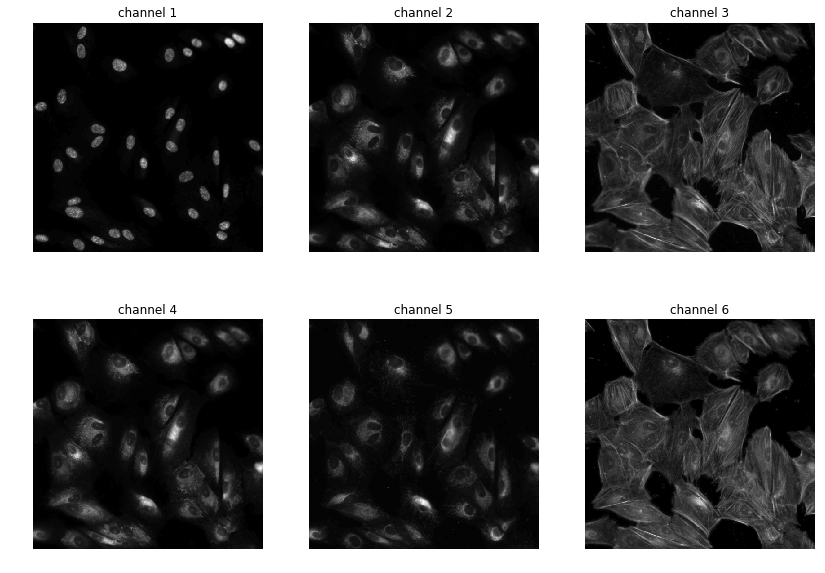

In [6]:
import rxrx.io as rio

t = rio.load_site('train', 'RPE-05', 3, 'D19', 2)

fig, axes = plt.subplots(2, 3, figsize=(14, 10))

for i, ax in enumerate(axes.flatten()):
  ax.axis('off')
  ax.set_title('channel {}'.format(i + 1))
  _ = ax.imshow(t[:, :, i], cmap='gray')

# **Example of Color image:** 

each color represents a different cell type. Each color emits a different wavelength which can be expressed in different image channels.

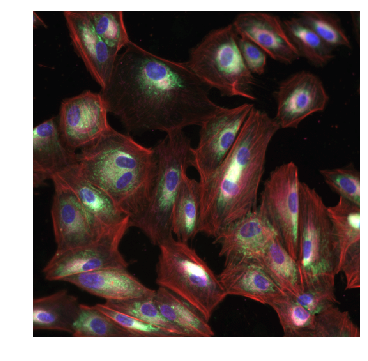

In [7]:

t = rio.load_site('train', 'RPE-05', 3, 'D19', 2)
dir(rio)

x = rio.convert_tensor_to_rgb(t)
x.shape

plt.figure(figsize=(6, 6))
plt.axis('off')
_ = plt.imshow(x)

# Building Data Stream:

In [8]:
import rxrx.input as input
# import rxrx.input_test as input_test

DEFAULT_INPUT_FN_PARAMS = {
    'tfrecord_dataset_buffer_size': 256,
    'tfrecord_dataset_num_parallel_reads': None,
    'parallel_interleave_cycle_length': 32,
    'parallel_interleave_block_length': 2,
    'parallel_interleave_buffer_output_elements': None,
    'parallel_interleave_prefetch_input_elements': None,
    'map_and_batch_num_parallel_calls': 128,
    'transpose_num_parallel_calls': 128,
    'prefetch_buffer_size': tf.contrib.data.AUTOTUNE,
}

GLOBAL_PIXEL_STATS = (np.array([6.74696984, 14.74640167, 10.51260864,
                                10.45369445,  5.49959796, 9.81545561]),
                       np.array([7.95876312, 12.17305868, 5.86172946,
                                 7.83451711, 4.701167, 5.43130431]))

params={'batch_size':128}


In [9]:
number_examples=70000
step_size=int(number_examples/params['batch_size'])
# step_size=6

# Building CNN_Layers: 

In [10]:

num_classes = 1108 #SiRNA are the classes here

def cnn_layers():
    Inp = tf.keras.Input(name='cell_img_input',shape=(512,512,6),)
    
    tf_records_glob=os.path.join( 'gs://rxrx1-us-central1/tfrecords/random-42', 'train', '*.tfrecord')

    filenames_dataset = tf.data.Dataset.list_files(tf_records_glob)

    dataset=input.input_fn(tf_records_glob,input_fn_params=DEFAULT_INPUT_FN_PARAMS,
                           pixel_stats=GLOBAL_PIXEL_STATS,params=params,transpose_input=False)
    print(type(dataset))
    print('+++++++++++++++++++++++++++++++++++++++++')

# 1st Convolutional Layer:
    x = layers.Conv2D(64,kernel_size=(5, 5),strides=(2,2),
                      activation='relu', padding='valid')(Inp)
    x = layers.MaxPooling2D(pool_size=(4, 4))(x)
# # 2nd Convolutional Layer:   
    x = layers.Conv2D(64, (2, 2), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
# # 3rd Convolutional Layer:
    x = layers.Conv2D(64, (2, 2), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
# # 4rd Convolutional Layer:
    x = layers.Conv2D(96, (2, 2), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
# # First Fully Connected Layer:   
    x = layers.Flatten()(x)
    x = layers.Dense(1108, activation='relu')(x)
    x = layers.Dropout(0.25)(x)
# Final Fully Connected Layer:    
    predictions = layers.Dense(num_classes,
                               activation='softmax',
                               name='x_train_out')(x)
    
    model = tensorflow.keras.models.Model(Inp,outputs=predictions)
    return model,dataset
    
  
 # https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
  #(Choosing layers and nodes)

## Train

Set `MODEL_DIR` to be a Google Cloud Storage bucket that you can write to.   The code will write your checkpoints to this directory.

**Compiling the model with a distribution strategy**:

To make the model usable by a TPU, we first must create and compile it using a distribution strategy.

# Training: 
First, we need to create a distribution strategy that can use the TPU. In this case it is TPUStrategy. You can create and compile the model inside its scope. Once that is done, future calls to the standard Keras methods fit, evaluate and predict use the TPU. Again note that we train with stateful=False because while training, we only care about one batch at a time.

[TPU help](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/shakespeare_with_tpu_and_keras.ipynb#scrollTo=VzBYDJI0_Tfm)

In [ ]:
# tf.keras.backend.clear_session()

with tf.device('/cpu:0'):
        model,datasets = cnn_layers()

optimizer=tf.train.AdamOptimizer(learning_rate=1e-3 )

# model = multi_gpu_model(model, gpus=2)    # USE THIS IF MULTIPLE GPU INSTANCE
  
model.compile(metrics=['acc'],
              optimizer=optimizer,
      loss='sparse_categorical_crossentropy')

filepath = './my_model.h5'

# checkpoint = ModelCheckpoint(filepath, monitor = 'loss', verbose = 1, save_best_only = True, mode = 'min')
checkpoint = ModelCheckpoint(filepath, monitor = 'acc', save_best_only = True, mode = 'max')


history=model.fit(datasets,
        epochs=8,
        steps_per_epoch=step_size,callbacks=[checkpoint])

model.save(filepath)

new_model = tensorflow.keras.models.load_model('my_model.h5')

model.summary()

W0816 22:49:27.702228 139753397679872 deprecation.py:323] From /home/jakdi59/rxrx1-utils/rxrx/input.py:110: parallel_interleave (from tensorflow.contrib.data.python.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
W0816 22:49:27.703344 139753397679872 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/contrib/data/python/ops/interleave_ops.py:77: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.
W0816 22:49:27.735456 139753397679872 deprecation.py:323] From /home/jakdi59/rxrx1-utils/rxrx/input.py:122: map_and_batch (from tensorflow.contrib

<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>
+++++++++++++++++++++++++++++++++++++++++
Epoch 1/8
545/546 [============================>.] - ETA: 2s - loss: 7.0152 - acc: 5.3039e-04

W0816 23:09:30.613466 139753397679872 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).


546/546 [==============================] - 1196s 2s/step - loss: 7.0152 - acc: 5.2942e-04
Epoch 2/8
250/546 [============>.................] - ETA: 10:44 - loss: 7.0116 - acc: 6.2500e-04

In [ ]:
# model_o=load_model('model.h5')


# jk=tensorflow.keras.models.load_model('model.h5')


# score_=jk.predict(dataset_test)

# print(score_)

In [ ]:
import rxrx.input_test as input_test

# Calling Test Data from Google Storage Bucket: 
tf_records_glob_test=os.path.join( 'gs://rxrx1-us-central1/tfrecords/random-42', 'test', '*.tfrecord')

filenames_dataset_test = tf.data.Dataset.list_files(tf_records_glob_test)

# Create Test Dataset:
dataset_test=input_test.input_fn(tf_records_glob_test,input_fn_params=DEFAULT_INPUT_FN_PARAMS,
                                 pixel_stats=GLOBAL_PIXEL_STATS,params=params,transpose_input=False)
score=model.predict(dataset_test)

print(score)

# Prediction & Kaggle Submission File:

In [ ]:
# score=model.predict(dataset_test)
#101 was a prime number of it
#1989/128 orig batch
print(len(score))
import numpy as np
import pandas as pd
j=[]
for i in score:
    h=np.argmax(i)
    j.append(h)

f=pd.read_csv('test.csv')
f.shape

k=pd.DataFrame(j,columns=['sirna'])

test_df_kaggle=pd.concat([f,k],axis=1)
fin_df=test_df_kaggle.iloc[:,[0,4]]
fin_df_=fin_df.dropna()
fin_df_.to_csv('kaggle_img_.csv',sep=',',index=False)


pd.read_csv('kaggle_img_.csv')


In [ ]:
print(dataset_test)
print(datasets)

In [ ]:
# submission = pd.read_csv(path_data + '/test.csv')
# submission['sirna'] = preds.astype(int)
# submission.to_csv('submission.csv', index=False, columns=['id_code','sirna'])

# Preparing for plots:

In [ ]:
# Find Keys of history log so I can plot:

print(history.history.keys())


# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://www.kaggle.com/tonypoe/keras-cnn-example

In [ ]:
plt.plot(range(0,1),history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('model accuracy')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')